# Simple multiclass non-linear ML supervised task

In [32]:
import sys
sys.path.insert(0,'../')

In [33]:
from matplotlib import pyplot as plt
import pandas as pd
import os

import tensorflow
from tensorflow.keras import layers, models
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from decentralized_smart_grid_ml.federated_learning import models_reader_writer

In [34]:
plt.style.use('seaborn')

First of all, we generate a linear separable dataset

In [35]:
# constants
n_samples = 5000
n_classes = 3
n_features = 2
seed = 2
epochs = 2
test_size = 0.2
TASK_PATH = "../data_sample/simple_multiclass_task/" 

In [36]:
x, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, cluster_std=2, random_state=seed)

Plot the dataset

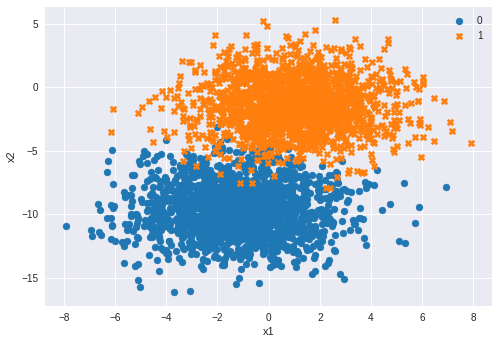

In [37]:
plt.scatter(x[:, 0][y == 0], x[:, 1][y == 0], color='tab:blue', marker='o', label="0")
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='tab:orange', marker='X', label="1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Save the dataset in a csv

In [38]:
database_path = TASK_PATH + "simple_multiclass_task.csv"

In [39]:
one_hot_y = to_categorical(y)

In [ ]:
df_dataset = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1]})
for idx_class in range(3):
    df_dataset["is_" + str(idx_class)] = [int(one_hot_y_i[idx_class]) for one_hot_y_i in one_hot_y]
display(df_dataset.head())
df_dataset.to_csv(database_path, index=False)

Split the whole dataset in train and test sets

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, one_hot_y, test_size=test_size, random_state=seed)

Train a simple linear classifier

In [41]:
partcipants_dataset_paths_pattern = os.path.join(
    TASK_PATH,
    "participants/participant_*",
    "*.csv"
)

In [42]:
import glob

In [43]:
participants_dataset_paths = glob.glob(partcipants_dataset_paths_pattern)

In [56]:
dataset_train = pd.read_csv(participants_dataset_paths[0]) 
for dataset_path in participants_dataset_paths[1:]:
    dataset_train.append(pd.read_csv(dataset_path))
display(dataset_train.head())

dataset_validation_path = os.path.join(
    TASK_PATH,
    "validator",
    "simple_multiclass_task_validation.csv"
)
dataset_validation = pd.read_csv(dataset_validation_path)
dataset_test_path = os.path.join(
    TASK_PATH,
    "validator",
    "simple_multiclass_task_test.csv"
)
dataset_test = pd.read_csv(dataset_test_path)

,x1,x2,is_0,is_1,is_2
0,-0.730887,-0.713327,0,1,0
1,-3.468769,-2.698910,0,0,1
2,-1.971308,-2.529508,0,0,1
3,-4.259129,-2.716915,0,0,1
4,1.209981,-2.993455,0,1,0


In [57]:
x_train, y_train = dataset_train[["x1", "x2"]].values, dataset_train[["is_0", "is_1", "is_2"]].values
x_val, y_val = dataset_validation[["x1", "x2"]].values, dataset_validation[["is_0", "is_1", "is_2"]].values
x_test, y_test = dataset_test[["x1", "x2"]].values, dataset_test[["is_0", "is_1", "is_2"]].values

In [58]:
# define model
model = models.Sequential()
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 2.0384 - accuracy: 0.3358
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 1.7220 - accuracy: 0.3358
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 1.4440 - accuracy: 0.3616
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 1.2247 - accuracy: 0.4465
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0593 - accuracy: 0.5166
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.9365 - accuracy: 0.5609
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.6089
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7982 - accuracy: 0.6605
Epoch 9/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7570 - accuracy: 0.6753
Epoch 10/100
9/9 [==============================] - 0s 1ms/step - loss: 0.7265 - accuracy: 0.6937
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8081
Epoch 85/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8118
Epoch 86/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.8118
Epoch 87/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8155
Epoch 88/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8155
Epoch 89/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8155
Epoch 90/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8192
Epoch 91/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.8155
Epoch 92/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4371 - accuracy: 0.8155
Epoch 93/100
9/9 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8229
Epoch 94/100
9/9 [===============

In [63]:
print("Validation evaluation")
print(model.evaluate(x_val, y_val))
print("Test evaluation")
print(model.evaluate(x_test, y_test))

Validation evaluation
27/27 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7706
[0.48887112736701965, 0.770588219165802]
Test evaluation
24/24 [==============================] - 0s 989us/step - loss: 0.4700 - accuracy: 0.7867
[0.4700435698032379, 0.7866666913032532]
